# CHAPTER 10 | Introduction to Articial Neural Networks with Keras

## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int) # Is Iris Setosa ?

In [3]:
per_clf = Perceptron(max_iter=1000, tol=1e-3)
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred # Should be 1, aka true

array([0])

## Implementing MLPs with Keras

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


### Building an image classifier user the sequential API

In [7]:
#Loading the dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
# Creating the Model using the sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Training and Evaluating the Model

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.7077 - accuracy: 0.7671 - val_loss: 0.5004 - val_accuracy: 0.8296
Epoch 2/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.4867 - accuracy: 0.8307 - val_loss: 0.4485 - val_accuracy: 0.8480
Epoch 3/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4444 - accuracy: 0.8446 - val_loss: 0.4314 - val_accuracy: 0.8514
Epoch 4/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4198 - accuracy: 0.8525 - val_loss: 0.3905 - val_accuracy: 0.8672
Epoch 5/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.3974 - accuracy: 0.8613 - val_loss: 0.4076 - val_accuracy: 0.8576
Epoch 6/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3816 - accuracy: 0.8660 - val_loss: 0.3994 - val_accuracy: 0.8592
Epoch 7/30
55000/55000 [==============================] 

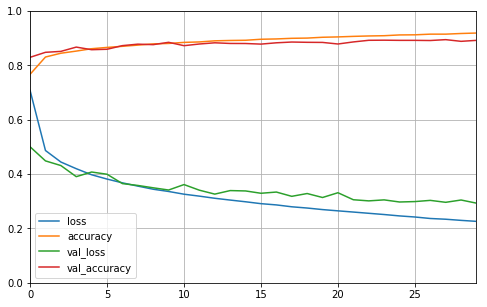

In [17]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

### Using the Model to Make Predictions

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [21]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [22]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
housing = fetch_california_housing()

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [27]:
# building the model

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer="sgd")

In [28]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 130us/sample - loss: 0.9746 - val_loss: 0.5406
Epoch 2/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5099 - val_loss: 0.4908
Epoch 3/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4891 - val_loss: 0.4666
Epoch 4/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5931 - val_loss: 0.4668
Epoch 5/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4617 - val_loss: 0.4546
Epoch 6/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4453 - val_loss: 0.4463
Epoch 7/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4389 - val_loss: 0.4450
Epoch 8/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4349 - val_loss: 0.4372
Epoch 9/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4269 - val_

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

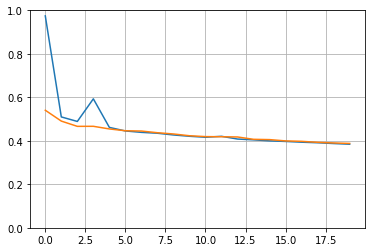

In [30]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Building Complex Models Using the Functional API

In [31]:
input_ = keras.layers.Input(shape=X_train.shape[1:])

hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])

output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

![](./images/chap10/figure10-13.png)

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

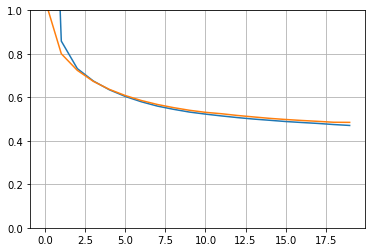

In [33]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

![](./images/chap10/figure10-14.png)

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 92us/sample - loss: 1.7223 - val_loss: 0.7631
Epoch 2/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.6990 - val_loss: 0.6644
Epoch 3/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.6343 - val_loss: 0.6280
Epoch 4/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.6042 - val_loss: 0.6016
Epoch 5/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5827 - val_loss: 0.5812
Epoch 6/20
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5660 - val_loss: 0.5656
Epoch 7/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.5519 - val_loss: 0.5521
Epoch 8/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5413 - val_loss: 0.5419
Epoch 9/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5320 - val_l

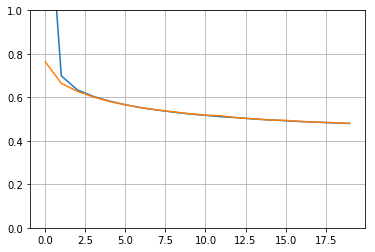

In [36]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

In [48]:
# Modol w/ multiple outputs

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [39]:
# 1 loss by output (or 1 for all (PLUS ULTRA!)) and we can apply loss_weight
# if we give more or less value to one of the losses
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

history = model.fit([X_train_A, X_train_B], [y_train, y_train],
    epochs=20,
    validation_data=(
        [X_valid_A, X_valid_B],
        [y_valid, y_valid]
    )
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 139us/sample - loss: 0.9023 - output_loss: 0.8083 - aux_output_loss: 1.7463 - val_loss: 0.6768 - val_output_loss: 0.6092 - val_aux_output_loss: 1.2861
Epoch 2/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.6379 - output_loss: 0.5792 - aux_output_loss: 1.1691 - val_loss: 0.5888 - val_output_loss: 0.5346 - val_aux_output_loss: 1.0764
Epoch 3/20
11610/11610 [==============================] - 1s 95us/sample - loss: 0.5586 - output_loss: 0.5124 - aux_output_loss: 0.9731 - val_loss: 0.5420 - val_output_loss: 0.5000 - val_aux_output_loss: 0.9193
Epoch 4/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5217 - output_loss: 0.4859 - aux_output_loss: 0.8467 - val_loss: 0.5145 - val_output_loss: 0.4808 - val_aux_output_loss: 0.8175
Epoch 5/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.5014 - output_loss: 0.4

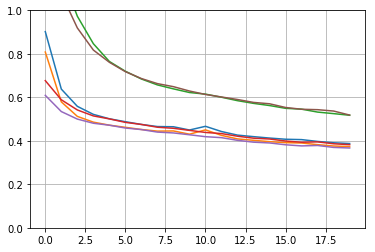

In [40]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

In [42]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main, y_pred_aux)

[[2.3878143]
 [2.0149055]
 [2.825224 ]] [[2.9691465]
 [2.248974 ]
 [3.0848932]]


### Building Dynamic Models Using the Subclassing API

In [44]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

In [49]:
subclass_model = WideAndDeepModel()

### Saving and Restoring a Model

In [51]:
model.save("./models/chap10/my_keras_model.h5")

In [53]:
model = keras.models.load_model("./models/chap10/my_keras_model.h5")
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           930         dense_16[0][0]                   
____________________________________________________________________________________________

### Using Callbacks

In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./models/chap10/my_keras_model_cp.h5")

In [55]:
# if you only want to keep the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint("./models/chap10/my_keras_model_cp.h5", save_best_only=True)

In [56]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

#### Custom Callbacks

In [57]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

Available methods on `keras.callbacks.Callback` on_train_begin(), on_train_end(),
on_epoch_begin(), on_epoch_begin(), on_batch_end() and on_batch_end().

In this case of callbacks during evaluation or predictions, on_test_begin(), on_test_end(), on_test_batch_begin(), or on_test_batch_end() (called by evaluate()), or on_predict_begin(), on_predict_end(), on_predict_batch_begin(), or on_predict_batch_end() (called by predict()).

## Fine-Tuning Neural Network Hyperparameters

In [58]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [59]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [60]:
keras_reg.fit(X_train, y_train, epochs=100, 
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 84us/sample - loss: 1.0939 - val_loss: 0.6036
Epoch 2/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5724 - val_loss: 0.5516
Epoch 3/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.5295 - val_loss: 0.5241
Epoch 4/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5059 - val_loss: 0.5053
Epoch 5/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4936 - val_loss: 0.4928
Epoch 6/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4841 - val_loss: 0.4858
Epoch 7/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4752 - val_loss: 0.4777
Epoch 8/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4667 - val_loss: 0.4706
Epoch 9/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.461

In [ ]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new, verbose=0)

In [65]:
y_pred

array([2.0341597, 1.8519298, 2.5585146], dtype=float32)

In [66]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [67]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [69]:
'''
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)
'''

'\nrnd_search_cv.fit(X_train, y_train, epochs=100,\n                  validation_data=(X_valid, y_valid),\n                  callbacks=[keras.callbacks.EarlyStopping(patience=5)]\n)\n'

## Exercices

4. Why was the logistic activation function a key ingredient in training the first MLPs?  
    It lets have a "gradient" in the value instead of a step.
5. Name three popular activation functions. Can you draw them?  
    Relu, Tanh and sigmoid.